In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit

In [2]:
@jit
def vonNeumannBox(N, x0, sigma):
    accepted = 0
    count = 0
    xa = np.zeros(N)
    A = 1 / (sigma * np.sqrt(2 * np.pi))
    
    bound = 3 * sigma
    
    while accepted < N:
        sign = np.random.choice(np.array([-1, 1]))
        r = np.random.rand()
        x = sign * r * (bound)
        p = np.exp(-(x)**2 / (2 * sigma**2)) * A
        pmax = 1
        r2 = np.random.rand() * pmax
        
        if r2 < p:
            xa[accepted] = x + x0
            accepted += 1
        count += 1
        
    return xa, count

@jit
def vonNeumannExp(N, lambd, x0, sigma):
    accepted = 0
    count = 0
    xa = np.zeros(N)
    A = 1 / (sigma * np.sqrt(2 * np.pi))
    
    while accepted < N:
        sign = np.random.choice(np.array([-1, 1]))
        r = np.random.rand() * lambd
        x = -1/lambd * sign * np.log(r / lambd)
        
        p = np.exp(-(x)**2 / (2 * sigma**2)) * A / (lambd * np.exp(-lambd * abs(x)))
        pmax = 1
        r2 = np.random.rand() * pmax
        
        if r2 < p:
            xa[accepted] = x + x0
            accepted += 1
        count += 1
    
    return xa, count

Total count: 12032542


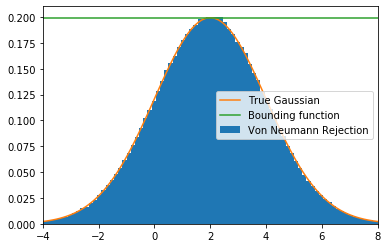

Total count: 2001422


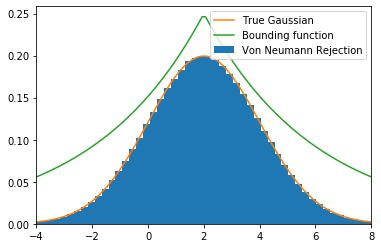

The exponential boundary was 6.011996470509468 times more efficient than the box boundary.


In [3]:
N = 1000000

x0 = 2
sigma = 2

lbound = -3*sigma + x0
ubound = 3*sigma + x0

x = np.linspace(lbound, ubound, 100)
A = 1 / (sigma * np.sqrt(2 * np.pi))
y = lambda x: A * np.exp(-(x - x0)**2 / (2 * sigma**2))
y1 = lambda x: A + 0*x
y2 = lambda x: np.exp(-lambd * abs(x)) * lambd

data1 = vonNeumannBox(N, x0, sigma)
lambd = 0.25
data2 = vonNeumannExp(N, lambd, x0, sigma)

print('Total count:', data1[1])
plt.hist(data1[0], bins = 80, density=True, label='Von Neumann Rejection')
plt.plot(x, y(x), label='True Gaussian')
plt.plot(x, y1(x - x0), label='Bounding function')
plt.xlim(lbound, ubound)

plt.legend(loc='best')
plt.show()

print('Total count:', data2[1])
plt.hist(data2[0], bins = 80, density=True, label='Von Neumann Rejection')
plt.plot(x, y(x), label='True Gaussian')
plt.plot(x, y2(x - x0), label='Bounding function')
plt.xlim(lbound, ubound)

plt.legend(loc='best')
plt.show()

print('The exponential boundary was', data1[1]/data2[1], 'times more efficient than the box boundary.')

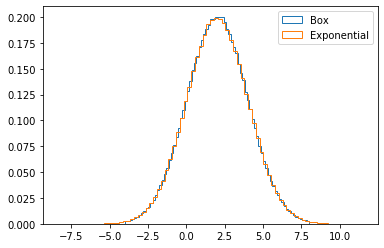

In [4]:
'''Comparing Gaussians'''

plt.hist(data1[0], bins = 80, density=True, histtype='step', label='Box')
plt.hist(data2[0], bins = 80, density=True, histtype='step', label='Exponential')
plt.legend(loc='best')

plt.show()